In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics         import classification_report
from src.Src import calcular_pesos_classes
from sklearn.utils import class_weight

In [10]:
X, y = make_classification(n_samples=8000, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.25)

In [11]:
pesos = calcular_pesos_classes(ytrain)

In [12]:
xtrain.shape

(6000, 20)

In [13]:
(6000-6000*0.2)/10

480.0

In [14]:
import keras

model = keras.models.Sequential([
    keras.layers.Dense(50,  activation='relu', name='camadaDeEntrada'),
    keras.layers.Dense(100, activation='relu', name='camadaOculta1'),
    keras.layers.Dense(100, activation='relu', name='camadaOculta2'),
    keras.layers.Dense(50,  activation='relu', name='camadaOculta3'),
    keras.layers.Dense(1,   activation='relu', name='camadaDeSaida')
])

model.compile(
    loss      = keras.losses.binary_crossentropy,
    optimizer = keras.optimizers.Adam(),
    metrics   = [keras.metrics.binary_accuracy]
)

history = model.fit(xtrain, ytrain, batch_size=20, epochs=30, validation_split=0.2, class_weight=pesos)



Epoch 1/30


240/240 [==============================] - 3s 4ms/step - loss: 0.5884 - binary_accuracy: 0.8150 - val_loss: 0.5309 - val_binary_accuracy: 0.8275
Epoch 2/30
240/240 [==============================] - 1s 3ms/step - loss: 0.5047 - binary_accuracy: 0.8194 - val_loss: 0.5567 - val_binary_accuracy: 0.8350
Epoch 3/30
240/240 [==============================] - 1s 3ms/step - loss: 0.4879 - binary_accuracy: 0.8281 - val_loss: 0.5516 - val_binary_accuracy: 0.8442
Epoch 4/30
240/240 [==============================] - 1s 3ms/step - loss: 0.4607 - binary_accuracy: 0.8423 - val_loss: 0.6775 - val_binary_accuracy: 0.8317
Epoch 5/30
240/240 [==============================] - 1s 3ms/step - loss: 0.4612 - binary_accuracy: 0.8540 - val_loss: 0.6314 - val_binary_accuracy: 0.7933
Epoch 6/30
240/240 [==============================] - 1s 3ms/step - loss: 0.4400 - binary_accuracy: 0.8550 - val_loss: 0.5165 - val_binary_accuracy: 0.8425
Epoch 7/30
240/240 [==============================] - 1s 3ms

In [15]:
pred = model.predict(xtest)>0.5

63/63 [==============================] - 0s 2ms/step


In [16]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1015
           1       0.85      0.83      0.84       985

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



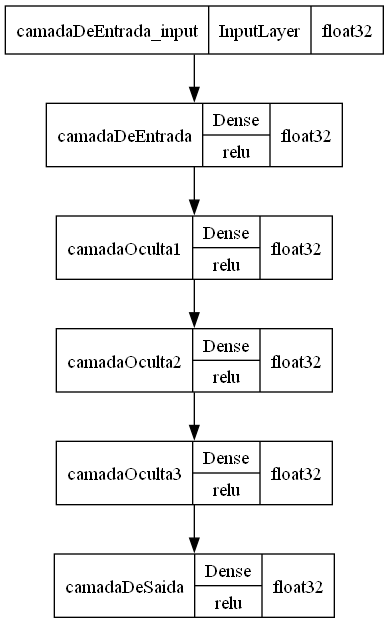

In [17]:
keras.utils.plot_model(
    model, to_file='img/ModelT1.png', show_shapes=False, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=True, show_trainable=False
)

In [18]:
model.save('ModelSave/modelTreinando0.keras')

In [19]:
model = keras.models.load_model('ModelSave/modelTreinando0.keras')

In [20]:
history = model.fit(xtrain, ytrain, batch_size=20, epochs=30, validation_split=0.2, class_weight=pesos)

Epoch 1/30
240/240 [==============================] - 2s 4ms/step - loss: 0.2026 - binary_accuracy: 0.9510 - val_loss: 1.1684 - val_binary_accuracy: 0.8483
Epoch 2/30
240/240 [==============================] - 1s 3ms/step - loss: 0.1923 - binary_accuracy: 0.9583 - val_loss: 1.0785 - val_binary_accuracy: 0.8425
Epoch 3/30
240/240 [==============================] - 1s 3ms/step - loss: 0.1755 - binary_accuracy: 0.9669 - val_loss: 1.2589 - val_binary_accuracy: 0.8517
Epoch 4/30
240/240 [==============================] - 1s 3ms/step - loss: 0.1723 - binary_accuracy: 0.9635 - val_loss: 1.2212 - val_binary_accuracy: 0.8450
Epoch 5/30
240/240 [==============================] - 1s 3ms/step - loss: 0.2640 - binary_accuracy: 0.9475 - val_loss: 1.2916 - val_binary_accuracy: 0.8417
Epoch 6/30
240/240 [==============================] - 1s 3ms/step - loss: 0.2691 - binary_accuracy: 0.9392 - val_loss: 1.4296 - val_binary_accuracy: 0.8417
Epoch 7/30
240/240 [==============================] - 1s 3ms/ste

In [23]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)